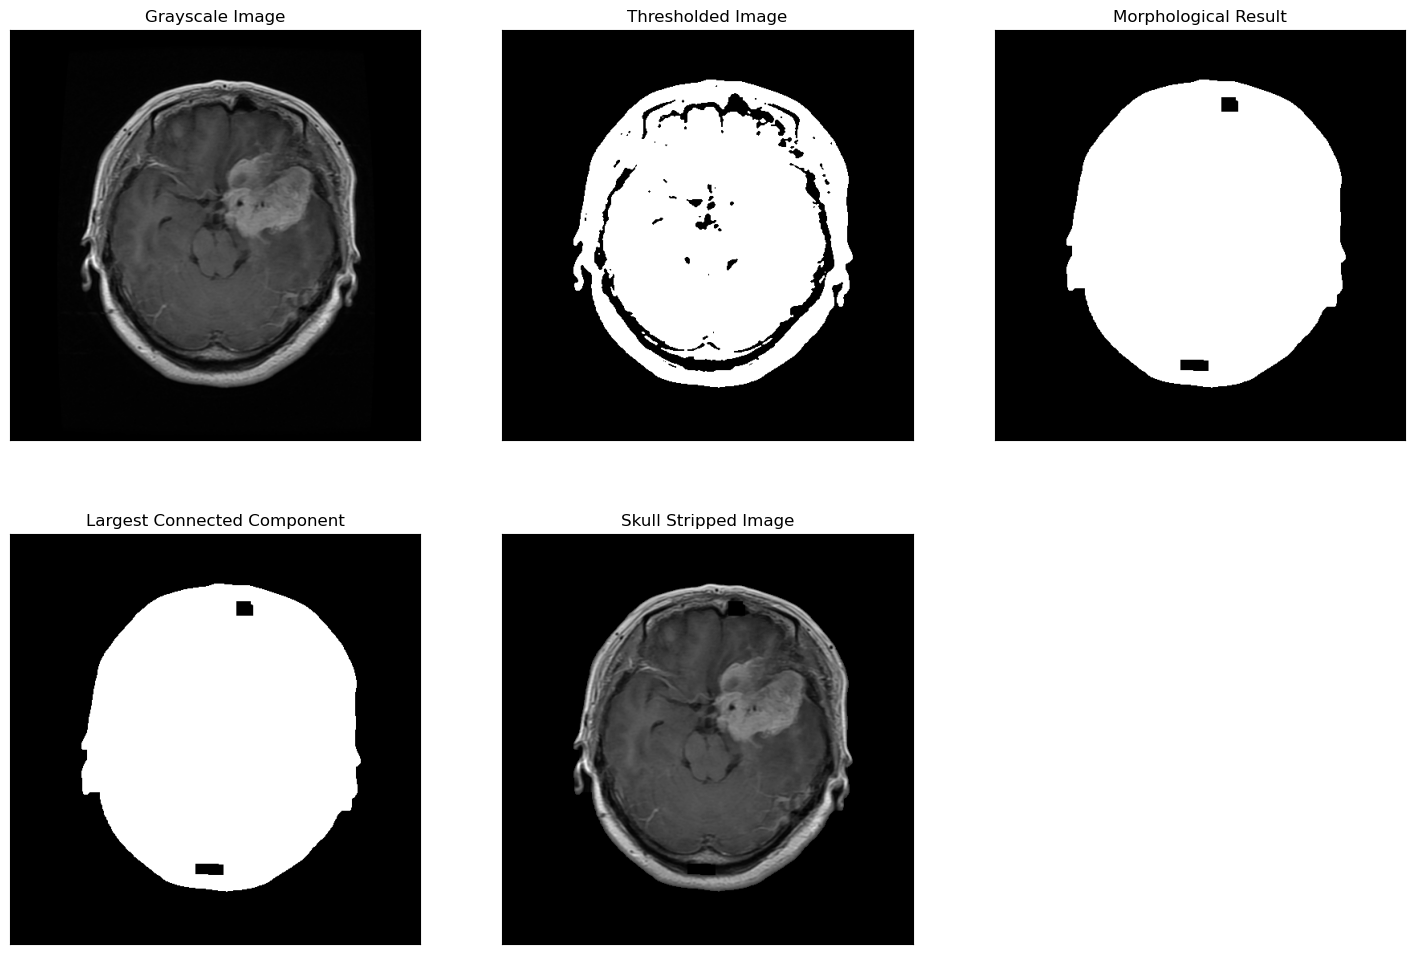

In [11]:
import cv2
import numpy as np
from skimage.measure import label
from matplotlib import pyplot as plt

# Function to get the largest connected component
def getLargestCC(segmentation):
    labels = label(segmentation)
    assert(labels.max() != 0)
    largestCC = labels == np.argmax(np.bincount(labels.flat)[1:]) + 1
    return largestCC.astype('uint8') * 255

# Load the image
img_path = "Dataset/input/images/2.png"  
img = cv2.imread(img_path, 0)  # Read the image in grayscale

# Apply median blur
img_blur = cv2.medianBlur(img, 3)

# Thresholding
thres, img_thres = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Morphological opening
kernel = np.ones((13, 13), 'uint8')
img_morph = cv2.morphologyEx(img_thres, cv2.MORPH_CLOSE, kernel, )

# Get the largest connected component
img_cc = getLargestCC(img_morph)
img_cc = img_cc.astype('uint8')*255

img_strip = cv2.bitwise_and(img,img, mask = img_cc)


plt.figure(figsize=(18, 12))

# Plot the grayscale image
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Grayscale Image')
plt.xticks([]), plt.yticks([])

# Plot the thresholded image
plt.subplot(2, 3, 2)
plt.imshow(img_thres, cmap='gray')
plt.title('Thresholded Image')
plt.xticks([]), plt.yticks([])

# Plot the morphological result
plt.subplot(2, 3, 3)
plt.imshow(img_morph, cmap='gray')
plt.title('Morphological Result')
plt.xticks([]), plt.yticks([])

# Plot the largest connected component
plt.subplot(2, 3, 4)
plt.imshow(img_cc, cmap='gray')
plt.title('Largest Connected Component')
plt.xticks([]), plt.yticks([])

# Plot the skull stripped image
plt.subplot(2, 3, 5)
plt.imshow(img_strip, cmap='gray')
plt.title('Skull Stripped Image')
plt.xticks([]), plt.yticks([])

plt.show()


In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.filters import sobel
from skimage.measure import label
from skimage.util import img_as_float
from skimage.morphology import remove_small_objects, footprints
from skimage.segmentation import (morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  mark_boundaries)
from timeit import default_timer as timer

C:\Users\ilyan\AppData\Local\Temp\ipykernel_29668\2293451007.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


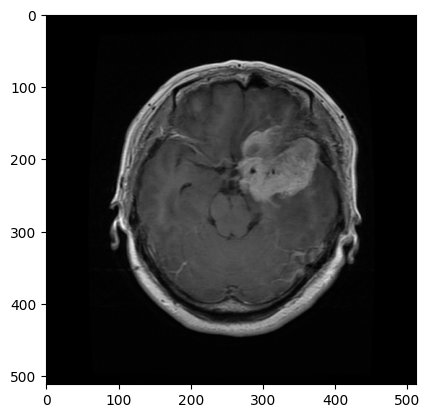

In [50]:
img_path = "Dataset/input/images/2.png"  # Replace "input_image.jpg" with the path to your image
img = cv2.imread(img_path,0)  # Read the image in grayscale
plt.imshow(img, cmap='gray')

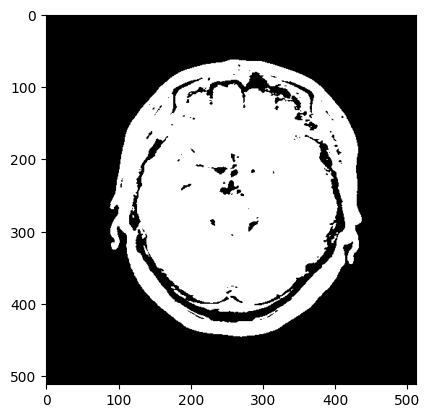

In [51]:
img_blur = cv2.medianBlur(img, 1)
#mean = np.mean(img_blur)
thres, img_thres = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) 
plt.imshow(img_thres, cmap='gray')

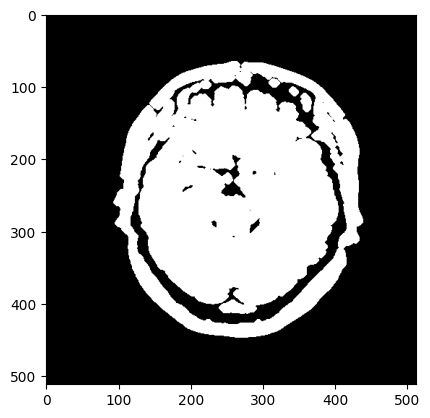

In [59]:
#noise removal
kernel = footprints.octagon(2,2)
img_morph = cv2.morphologyEx(img_thres, cv2.MORPH_OPEN, kernel, iterations=2)
plt.imshow(img_morph,cmap='gray')

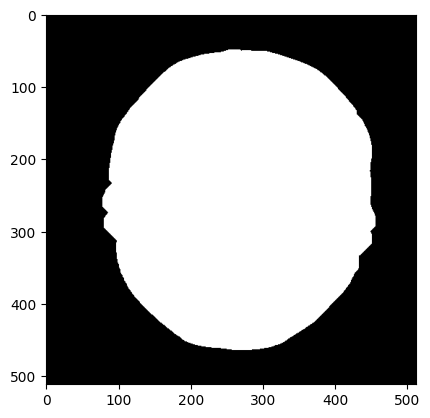

In [53]:
#sure background
sure_bg = cv2.dilate(img_morph,kernel,iterations=3)
plt.imshow(sure_bg,cmap='gray')

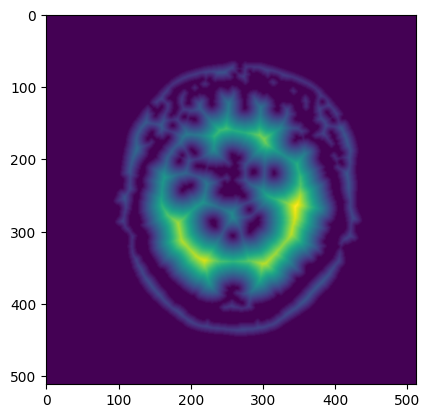

In [42]:
#sure fg
distTrans= cv2.distanceTransform(img_morph,cv2.DIST_L2,5)
plt.imshow(distTrans)
distTrans = np.uint8(distTrans)

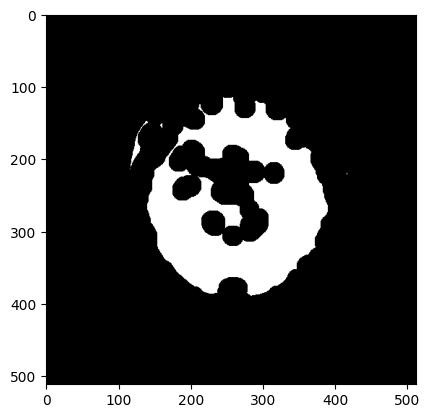

In [44]:
thres, sure_fg = cv2.threshold(distTrans, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) 
sure_fg = np.uint8(sure_fg)
plt.imshow(sure_fg, cmap='gray')

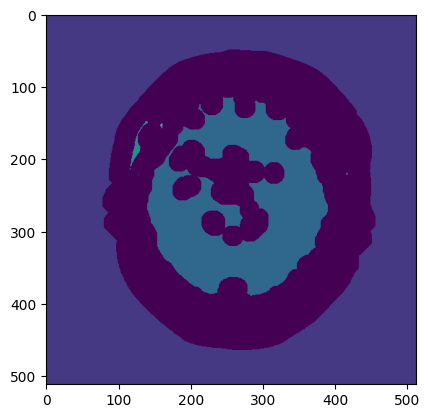

In [62]:
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = np.uint8(markers)

plt.imshow(markers)

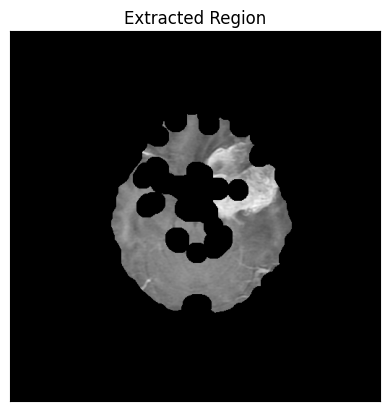

In [72]:
desired_label = 2 # Change this to the label you want

# Create a binary mask for the desired label
region_mask = np.uint8(markers == desired_label)

# Multiply the original image with the binary mask to extract the desired region
extracted_region = cv2.bitwise_and(img, img, mask=region_mask)

# Display the results
plt.imshow(extracted_region, cmap='gray')
plt.title('Extracted Region')
plt.xticks([]), plt.yticks([])
plt.show()